Zaimportowanie potrzebnych bibliotek


In [144]:
from pyswarms.utils.plotters import plot_cost_history
from pyswarms.single.global_best import GlobalBestPSO
import matplotlib.pyplot as plt
import numpy as np


Stworzenie funkcji `endurance`, która oblicza wytrzymałość stopu metali na podstawie tablicy `6` parametrów,
oraz funkcji optymalizującej, która wylicza wartość funkcji `endurance` dla każdej cząsteczki roju


In [145]:
def endurance(args):
    return -(np.exp(-2*(args[1]-np.sin(args[0]))**2)+np.sin(args[2]*args[3])+np.cos(args[4]*args[5]))


def optimizer_function(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)


Ustalenie granicy dolnej i górnej jako `0` i `1` dla każdej współrzędnej


In [146]:
x_min = np.zeros(6)
x_max = np.ones(6)
bounds = (x_min, x_max)


Ustalenie współczynników: `c1` (dążenie do najlepszego indywidualnego rozwiązania) na `0.5`, `c2` (dążenie do najlepszego lokalnego rozwiązania) na `0.3` oraz `w` (bezwładności) na `0.9`


In [147]:
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


Stworzenie instancji algorytmu `PSO (Particle Swarm Optimization)` oraz jego uruchomienie, a następnie wyświetlenie wyniku


In [148]:
optimizer = GlobalBestPSO(
    n_particles=10, dimensions=6, options=options, bounds=bounds)

cost, pos = optimizer.optimize(optimizer_function, iters=1000, verbose=False)

print("Best endurance: {}".format(-cost))
print("Parameters of the best solution: {}".format(pos))


Best endurance: 2.822389638758148
Parameters of the best solution: [0.45936664 0.46281557 0.97416168 0.99479677 0.0992559  0.49930369]


Wyświetlenie historii zmian kosztu


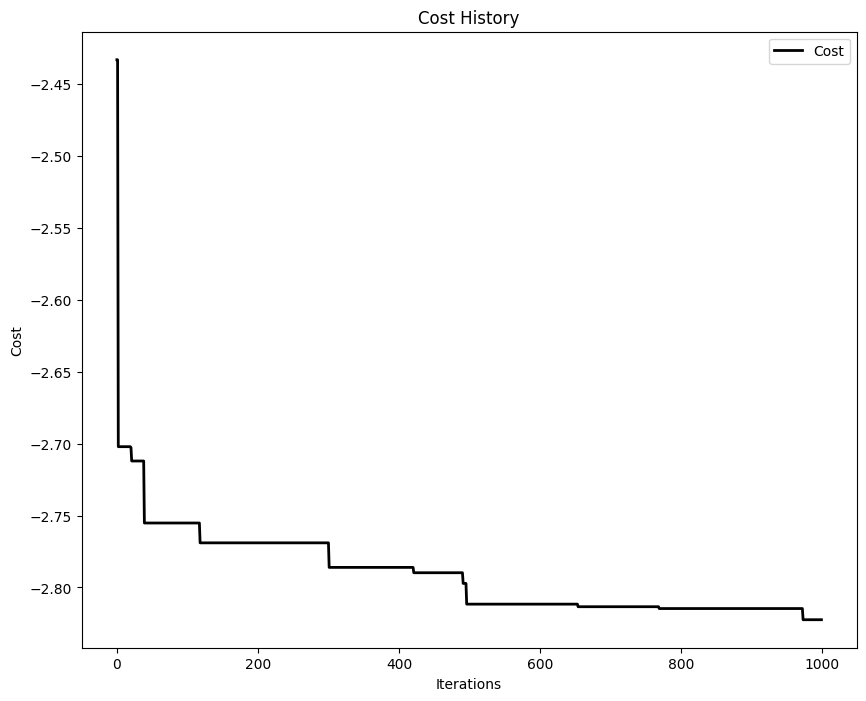

In [149]:
cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()
